In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [18]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
skew = train['Survived'].skew()
skew

np.float64(0.4785234382949897)

In [22]:
train= train.drop(['PassengerId'],axis=1)
train= train.drop(['Name'],axis=1)
train["Has_Cabin"] = train["Cabin"].notnull().astype(int)
train.drop("Cabin", axis=1, inplace=True)




In [23]:
train.isna().sum()


Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Has_Cabin      0
dtype: int64

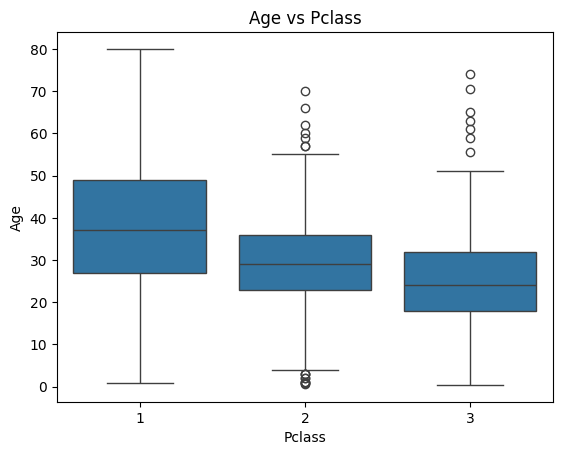

In [25]:
sns.boxplot(x="Pclass", y="Age", data=train)
plt.title("Age vs Pclass")
plt.show()


In [26]:
train.groupby("Pclass")["Age"].median()


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [27]:
train["Age"] = train.groupby(["Pclass"])["Age"].transform(lambda x:x.fillna(x.median()))


In [28]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])


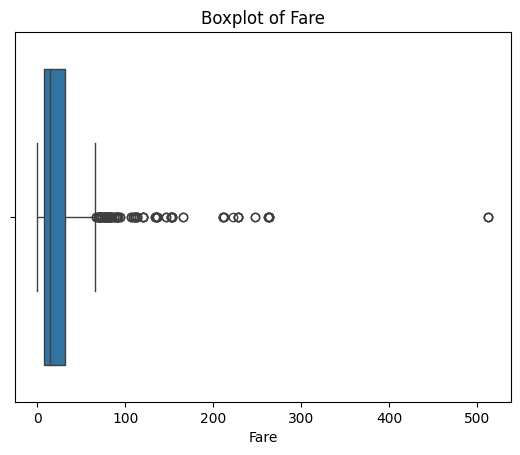

In [29]:
sns.boxplot(x=train["Fare"])
plt.title("Boxplot of Fare")
plt.show()


In [30]:
Q1=train['Fare'].quantile(0.25)
Q3=train['Fare'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
train_after=train[(train['Fare']>=lower_bound) & (train['Fare'] <=upper_bound)]

In [31]:
print("قبل:", train.shape)
print("بعد:", train_after.shape)


قبل: (891, 10)
بعد: (838, 10)


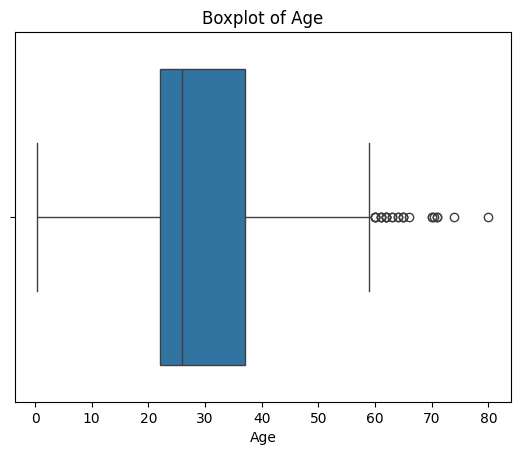

In [32]:

sns.boxplot(x=train["Age"])
plt.title("Boxplot of Age")
plt.show()


In [33]:
Q1=train_after['Age'].quantile(0.25)
Q3=train_after['Age'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
train_after=train_after[(train_after['Age']>=lower_bound) & (train_after['Age'] <=upper_bound)]

In [34]:
print("قبل:", train.shape)
print("بعد:", train_after.shape)

قبل: (891, 10)
بعد: (837, 10)


In [35]:
train_after.dtypes

Survived       int64
Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked      object
Has_Cabin      int64
dtype: object

In [36]:
train_after['Sex']=train['Sex'].map({"male":0,"female":1})

In [37]:
train_after=pd.get_dummies(train_after,columns=['Embarked'],drop_first=True)


In [38]:
train_after.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Has_Cabin,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0,False,True
1,1,1,1,38.0,1,0,PC 17599,71.2833,1,False,False
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,False,True
3,1,1,1,35.0,1,0,113803,53.1000,1,False,True
4,0,3,0,35.0,0,0,373450,8.0500,0,False,True


In [39]:
train_after.drop(['Ticket'],axis=1,inplace=True)

In [40]:
X = train_after.drop("Survived", axis=1)  # المدخلات
y = train_after["Survived"]  # الهدف


In [41]:

train_after.to_csv("train_preprocessed.csv", index=False)


In [42]:
train_after.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,False,True
1,1,1,1,38.0,1,0,71.2833,1,False,False
2,1,3,1,26.0,0,0,7.9250,0,False,True
3,1,1,1,35.0,1,0,53.1000,1,False,True
4,0,3,0,35.0,0,0,8.0500,0,False,True


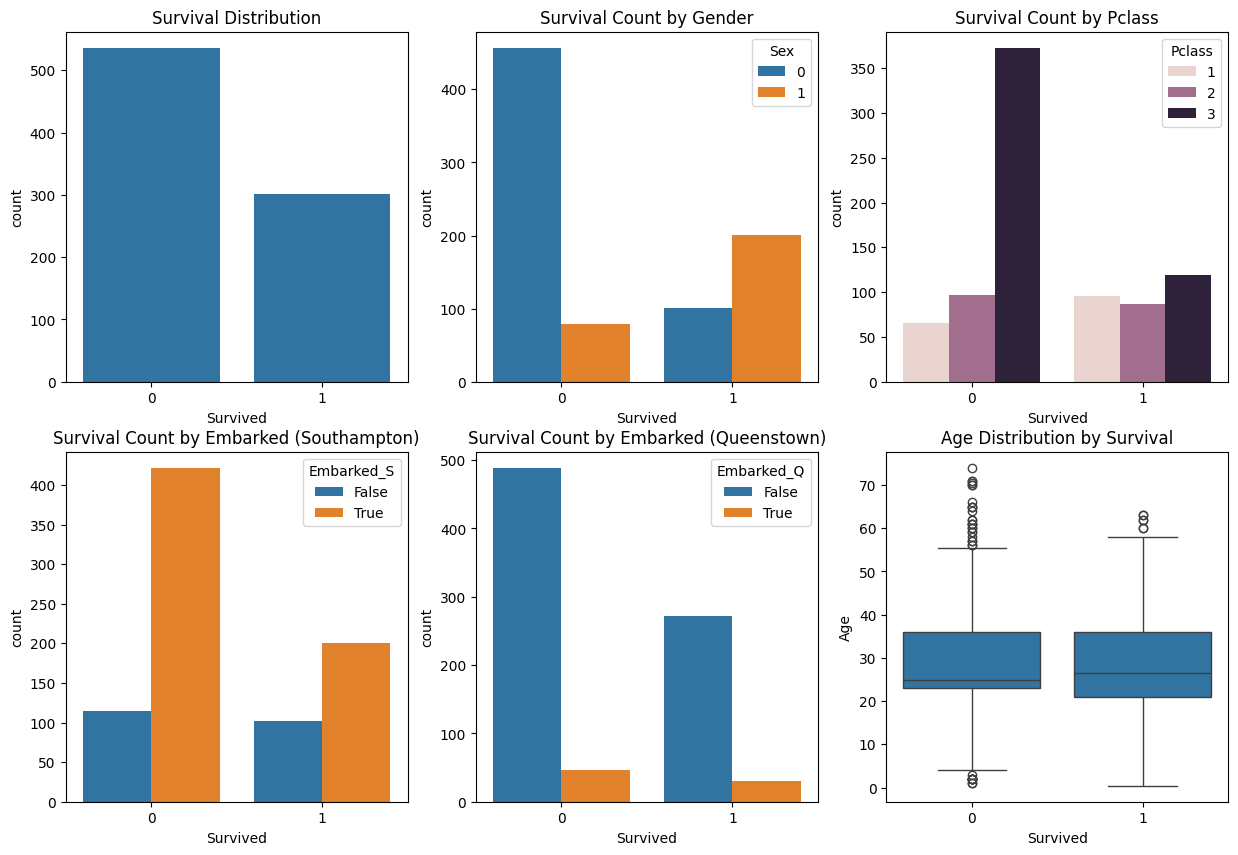

In [51]:
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=train_after)
plt.title('Survival Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Survived', hue='Sex', data=train_after)
plt.title('Survival Count by Gender')

plt.subplot(2, 3, 3)
sns.countplot(x='Survived', hue='Pclass', data=train_after)
plt.title('Survival Count by Pclass')

plt.subplot(2, 3, 4)
sns.countplot(x='Survived', hue='Embarked_S', data=train_after)
plt.title('Survival Count by Embarked (Southampton)')

plt.subplot(2, 3, 5)
sns.countplot(x='Survived', hue='Embarked_Q', data=train_after)
plt.title('Survival Count by Embarked (Queenstown)')

plt.subplot(2, 3, 6)
sns.boxplot(x='Survived', y='Age', data=train_after)
plt.title('Age Distribution by Survival')


plt.show()


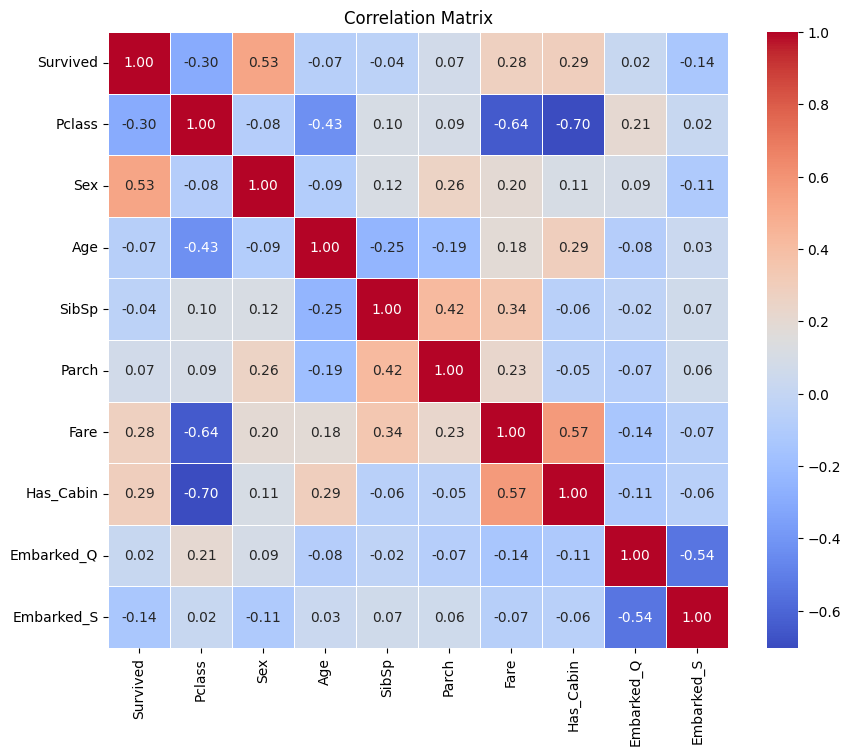

In [52]:
correlation_matrix = train_after.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
test= pd.read_csv('test.csv')
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.describe


<bound method NDFrame.describe of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked 

In [14]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
test= test.drop(['PassengerId'],axis=1)
test= test.drop(['Name'],axis=1)                

In [16]:
test["Has_Cabin"] = test["Cabin"].notnull().astype(int)
test.drop("Cabin", axis=1, inplace=True)
test.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      0
Has_Cabin     0
dtype: int64

In [17]:
test['Fare'].isna().sum()
test['Fare'].fillna(test['Fare'].median(), inplace=True)        

C:\Users\dell\AppData\Local\Temp\ipykernel_15284\452638990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].median(), inplace=True)


In [18]:
test.groupby("Pclass")["Age"].median()


Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [19]:
test["Age"] = test.groupby(["Pclass"])["Age"].transform(lambda x:x.fillna(x.median()))


In [20]:
test.isna().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
Has_Cabin    0
dtype: int64

In [22]:
Q1=test['Fare'].quantile(0.25)
Q3=test['Fare'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
test_after=test[(test['Fare']>=lower_bound) & (test['Fare'] <=upper_bound)]

In [23]:
print("قبل:", test.shape)
print("بعد:", test_after.shape)


قبل: (418, 9)
بعد: (387, 9)


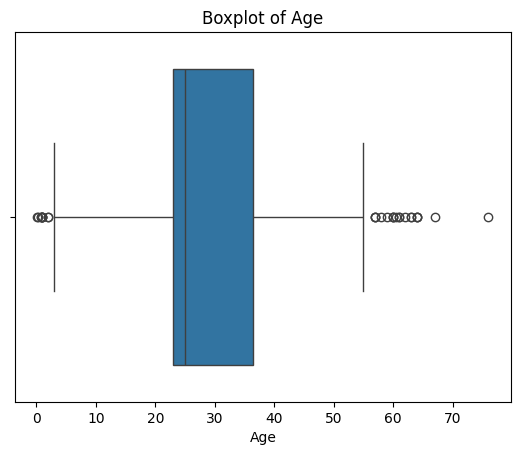

In [24]:
sns.boxplot(x=test["Age"])
plt.title("Boxplot of Age")
plt.show()


In [31]:
Q1=test_after['Age'].quantile(0.25)
Q3=test_after['Age'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
test_after=test_after[(test_after['Age']>=lower_bound) & (test_after['Age'] <=upper_bound)]

In [26]:
print("قبل:", test.shape)
print("بعد:", test_after.shape)

قبل: (418, 9)
بعد: (386, 9)


In [27]:
test_after.dtypes

Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked      object
Has_Cabin      int64
dtype: object

In [28]:
test_after['Sex']=test['Sex'].map({"male":0,"female":1})


In [29]:
test_after=pd.get_dummies(test_after,columns=['Embarked'],drop_first=True)


In [34]:
test_after.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,True,False
1,3,1,47.0,1,0,7.0000,0,False,True
2,2,0,62.0,0,0,9.6875,0,True,False
3,3,0,27.0,0,0,8.6625,0,False,True
4,3,1,22.0,1,1,12.2875,0,False,True


In [33]:
test_after.drop(['Ticket'],axis=1,inplace=True)

In [35]:
test_after.to_csv("test_preprocessed.csv", index=False)